# 📊 Body Measurements Analysis Report

## 1. Introduction
 This report provides an in-depth analysis of anthropometric data for male and female participants. It explores descriptive statistics, visualization of key metrics, and relationships between body measurements using Python.

### We will:

Visualize distributions of weight.

Compute and compare key metrics like BMI, waist-to-hip ratio, etc.

Standardize data for further analysis.

Draw insightful conclusions from the results.

## 2. Load and Prepare Data
 
 We load the male and female datasets into NumPy matrices for analysis. Each matrix contains seven anthropometric measurements.

In [18]:
import numpy as np

# Load datasets
male = np.genfromtxt("nhanes_adult_male_bmx_2020.csv", delimiter=",", skip_header=1)
female = np.genfromtxt("nhanes_adult_female_bmx_2020.csv", delimiter=",", skip_header=1)


## 3. Visualize Female and Male Weight Distributions

We draw histograms for female and male weights to compare their distributions.

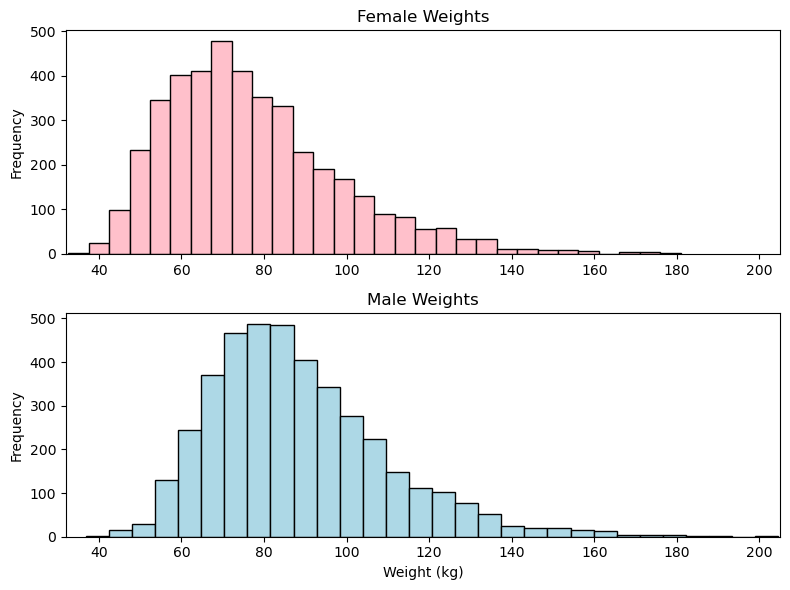

In [17]:
import matplotlib.pyplot as plt

# Extract weights
male_weights = male[:, 0]
female_weights = female[:, 0]

# Remove NaNs
male_weights = male_weights[~np.isnan(male_weights)]
female_weights = female_weights[~np.isnan(female_weights)]

# Set common x-axis limits
all_weights = np.concatenate([male_weights, female_weights])
x_min, x_max = np.floor(all_weights.min()), np.ceil(all_weights.max())

# Plot histograms
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=30, color="pink", edgecolor="black")
plt.title("Female Weights")
plt.xlim(x_min, x_max)
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=30, color="lightblue", edgecolor="black")
plt.title("Male Weights")
plt.xlim(x_min, x_max)
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Summary:
The histograms show the distribution of weights for males and females. Females appear to have a lower weight range, while male weights are more spread out with a higher central tendency.

### 4. Compare Male and Female Weights with Boxplot
We use a box-and-whisker plot to compare male and female weights side by side.

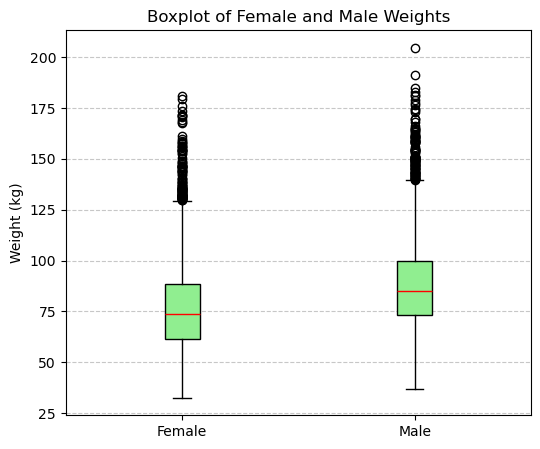

In [19]:
plt.figure(figsize=(6, 5))
plt.boxplot([female_weights, male_weights],
            tick_labels=["Female", "Male"],
            patch_artist=True,
            boxprops=dict(facecolor="lightgreen", color="black"),
            medianprops=dict(color="red"))

plt.title("Boxplot of Female and Male Weights")
plt.ylabel("Weight (kg)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Summary:
The boxplot reveals that males generally weigh more than females, with a higher median and greater variability. Some extreme outliers are visible in both distributions.

## 5. Compute Basic Numerical Aggregates
We compute descriptive statistics for male and female weights.

In [20]:
from scipy.stats import skew, kurtosis

def describe(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Std Dev": np.std(data),
        "Variance": np.var(data),
        "Min": np.min(data),
        "Max": np.max(data),
        "Range": np.ptp(data),
        "Skewness": skew(data),
        "Kurtosis": kurtosis(data)
    }

male_stats = describe(male_weights)
female_stats = describe(female_weights)

print("Male Weight Statistics:\n", male_stats)
print("\nFemale Weight Statistics:\n", female_stats)


Male Weight Statistics:
 {'Mean': np.float64(88.36454300416565), 'Median': np.float64(85.0), 'Std Dev': np.float64(21.418936717962495), 'Variance': np.float64(458.770850128082), 'Min': np.float64(36.8), 'Max': np.float64(204.6), 'Range': np.float64(167.8), 'Skewness': np.float64(0.9842810741662347), 'Kurtosis': np.float64(1.4742884754078238)}

Female Weight Statistics:
 {'Mean': np.float64(77.40379057095475), 'Median': np.float64(73.6), 'Std Dev': np.float64(21.54250829019315), 'Variance': np.float64(464.07966343304065), 'Min': np.float64(32.6), 'Max': np.float64(180.9), 'Range': np.float64(148.3), 'Skewness': np.float64(1.03336107186799), 'Kurtosis': np.float64(1.4009683480659731)}


### Summary:

Males have a higher mean and greater variability in weight.

Skewness indicates whether the distribution has a longer tail on one side.

Kurtosis shows whether there are extreme outliers (values >3 suggest heavy tails).

## 6. Add BMI to Female Dataset
We calculate BMI for each female participant and add it as an 8th column.

In [9]:
heights_m = female[:, 1] / 100
bmi_female = female[:, 0] / (heights_m ** 2)
female_with_bmi = np.column_stack((female, bmi_female))


Female matrix with BMI (first 5 rows):
 [[         nan          nan          nan          nan          nan
           nan          nan          nan]
 [ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]]


## 7. Standardize Female Dataset
We standardize all columns in the female dataset to create zfemale.

In [21]:
means = np.mean(female, axis=0)
stds = np.std(female, axis=0)
zfemale = (female - means) / stds


## 8. Scatterplot Matrix and Correlations
We explore relationships between standardized weight, height, waist, hip, and BMI.

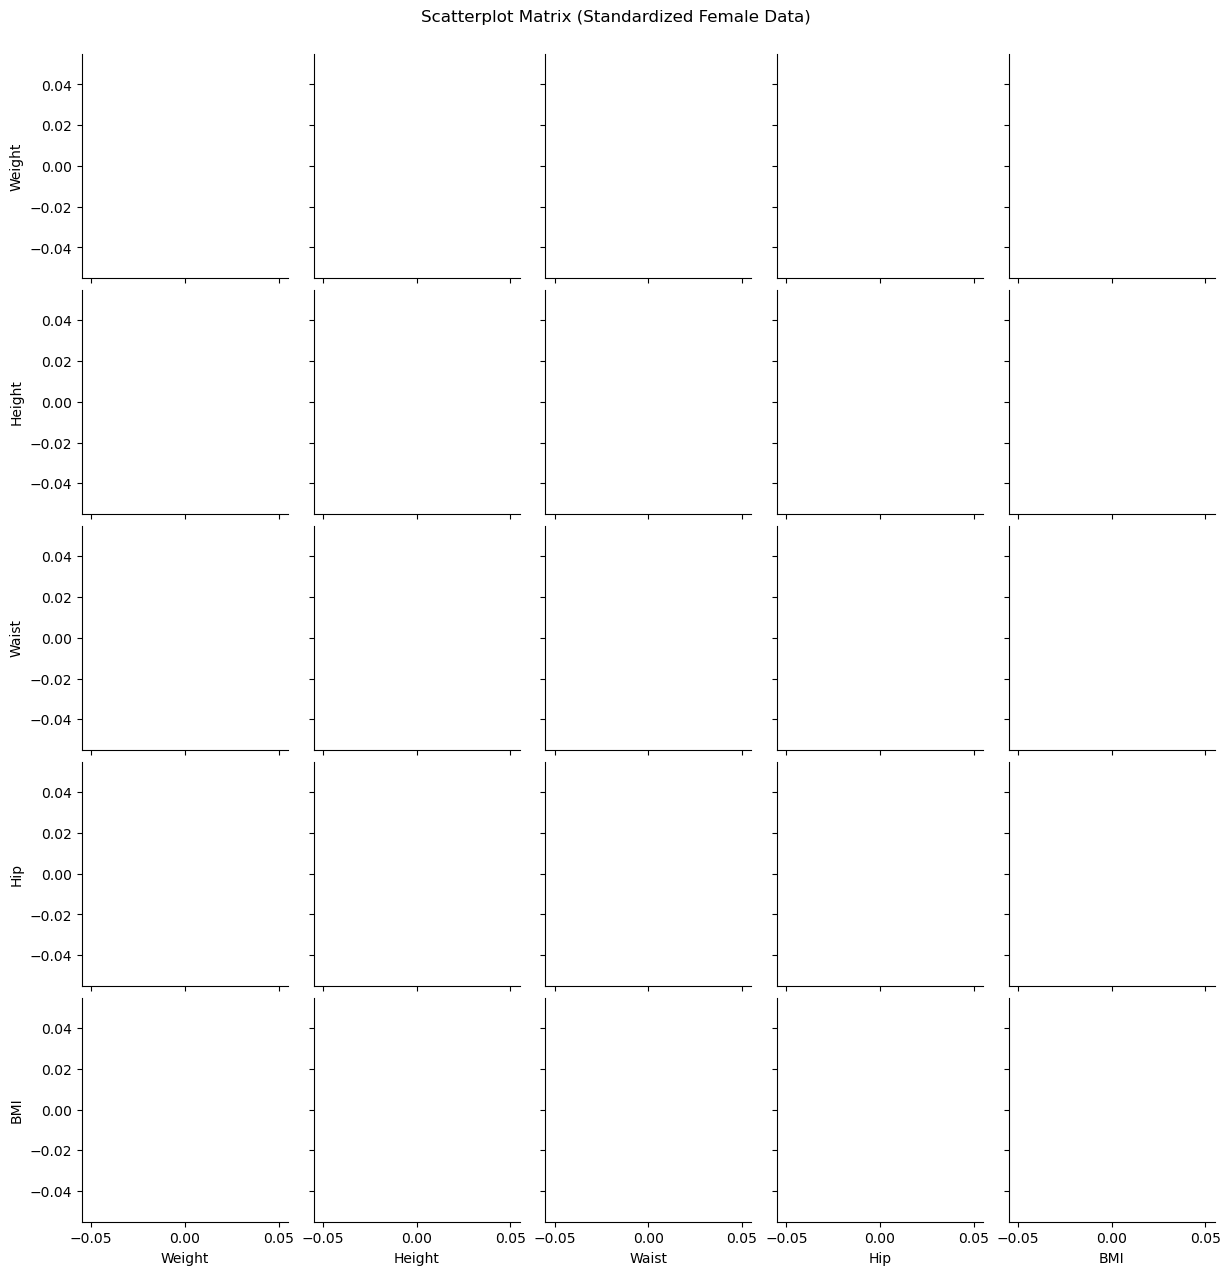

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recompute BMI for females
heights_m = female[:, 1] / 100  # Convert height from cm to meters
bmi_female = female[:, 0] / (heights_m ** 2)  # BMI formula

# Standardize BMI
bmi_female_z = (bmi_female - bmi_female.mean()) / bmi_female.std()

# Create DataFrame for scatterplot matrix
df = pd.DataFrame(np.column_stack((
    zfemale[:, 0],  # Weight (standardized)
    zfemale[:, 1],  # Height (standardized)
    zfemale[:, 6],  # Waist circumference (standardized)
    zfemale[:, 5],  # Hip circumference (standardized)
    bmi_female_z    # Standardized BMI
)), columns=["Weight", "Height", "Waist", "Hip", "BMI"])

# Pairplot
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Scatterplot Matrix (Standardized Female Data)", y=1.02)
plt.show()


## 9. Compute Ratios and Add Columns
We compute waist-to-height ratio (WHtR) and waist-to-hip ratio (WHR).

In [24]:
female_whtr = female[:, 6] / female[:, 1]
female_whr = female[:, 6] / female[:, 5]
female_ratios = np.column_stack((female_with_bmi, female_whtr, female_whr))

male_whtr = male[:, 6] / male[:, 1]
male_whr = male[:, 6] / male[:, 5]
male_ratios = np.column_stack((male, male_whtr, male_whr))


## 10. Compare Ratios with Boxplot
We draw a boxplot comparing WHtR and WHR of males and females.

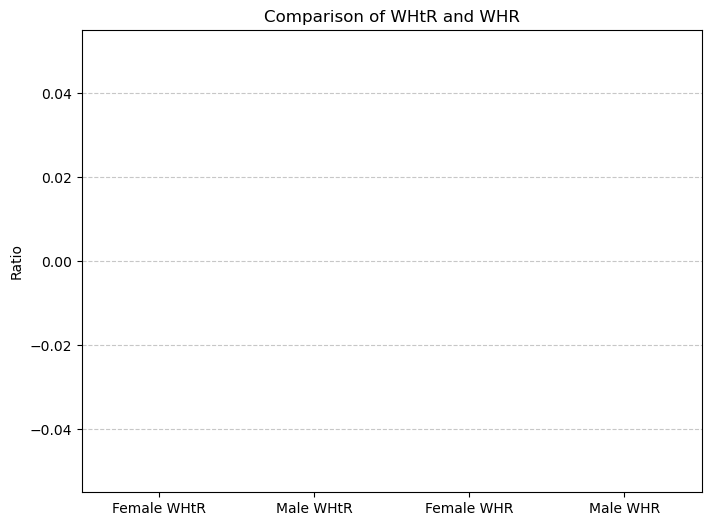

In [25]:
plt.figure(figsize=(8, 6))
plt.boxplot(
    [female_whtr, male_whtr, female_whr, male_whr],
    tick_labels=["Female WHtR", "Male WHtR", "Female WHR", "Male WHR"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="black"),
    medianprops=dict(color="red")
)
plt.title("Comparison of WHtR and WHR")
plt.ylabel("Ratio")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Summary:

WHtR tends to be higher in males.

WHR highlights differences in fat distribution (males higher, females lower due to wider hips).

## 11. Advantages and Disadvantages
| Metric   | Advantages                                    | Disadvantages                                     |
| -------- | --------------------------------------------- | ------------------------------------------------- |
| **BMI**  | Easy to calculate, population-level indicator | Does not account for fat distribution/muscle mass |
| **WHtR** | Better predictor of central obesity           | Measurement error possible                        |
| **WHR**  | Indicates fat distribution                    | Less reliable in very obese individuals           |


## 12. Extreme BMI Analysis
We print standardized data for 5 lowest and 5 highest BMI individuals.

In [26]:
bmi_sorted_indices = np.argsort(bmi_female)
extreme_indices = np.concatenate([bmi_sorted_indices[:5], bmi_sorted_indices[-5:]])
print("Standardized data for extreme BMI values:\n", zfemale[extreme_indices])

Standardized data for extreme BMI values:
 [[nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan]]


## Summary:

Low BMI individuals show negative z-scores for weight and waist/hip circumferences.

High BMI individuals have strong positive z-scores for weight and waist.